In [589]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [590]:
housing = pd.DataFrame(pd.read_csv("Housing.csv")) 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [591]:
m = len(housing) 
m

545

In [592]:
housing.shape

(545, 13)

In [593]:

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [594]:

Newtrain.shape

(545, 6)

In [595]:
dataset_np = Newtrain.to_numpy()
np.random.shuffle(dataset_np)
dataset = torch.tensor(dataset_np)
t_c = dataset[:,5] /1000000
t_c

tensor([ 3.3600,  5.7400,  5.4600,  2.8700,  3.7450,  5.1100,  4.4450,  9.8000,
         5.2850,  6.2930,  3.3600,  3.1500,  4.5430,  3.6400,  3.1500,  5.8100,
         7.9800,  3.2900,  4.7530,  8.2950,  3.4650,  7.0700,  4.0600,  6.2300,
         3.6750,  4.8930,  2.3800,  3.5700,  4.6200,  4.6550,  2.8000,  3.1150,
        10.1500,  3.7100,  3.4650,  4.4730,  2.9400,  5.5650,  2.3800,  4.7950,
         3.5000,  3.5000,  6.8600,  3.9900,  5.2500,  3.7100,  2.4850,  2.2330,
         3.5000,  5.6000,  3.7800,  2.9400,  7.3500,  4.8300,  7.9625,  6.1950,
         4.5150,  3.4300,  1.8900,  4.2000,  2.9400,  5.9430,  5.5300,  4.1300,
         4.6130,  6.1600,  5.8800,  6.8950,  3.2200,  4.2000,  7.7000,  3.9200,
         4.3050,  3.0800,  3.6400,  4.8300,  3.2900,  4.5500,  4.2000,  5.6000,
         3.7800,  3.0870,  4.3400,  2.9400,  4.9000,  7.7000,  2.1000,  3.5000,
         4.6900,  5.8730,  5.2500,  4.0250,  9.8700,  5.2150,  5.2500,  4.0600,
         5.9500,  4.6900,  3.5000,  6.62

In [596]:
t_un = dataset[:,:5]
t_un = t_un * 0.1
W1 = t_un[:,0]
W2 = t_un[:,1]
W3 = t_un[:,2]
W4 = t_un[:,3]
W5 = t_un[:,4]

In [597]:
def model(t_u, w1, w2, w3, w4, w5, b):
    return (W1*w1 + W2*w2 + W3*w3 + W4*w4 + W5*w5 + b) / 100

In [598]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [599]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [600]:
t_p = model(t_un,*params)
t_p

tensor([ 3.5090,  5.4100,  3.1560,  6.0040,  3.4840, 11.4150,  3.7540,  5.7600,
         4.6070,  6.6080,  4.1250,  3.0740,  4.1050,  3.5250,  9.0080,  5.2070,
         9.0120,  5.8860,  6.4470,  4.8890,  3.0650,  6.2490,  5.0010,  5.5080,
         3.6040,  3.4300,  3.2680,  3.1560,  5.6870,  3.7510,  2.6570,  3.5040,
        16.2100,  4.0440,  5.3250,  3.5160,  3.1560,  4.4090,  2.4810,  8.1110,
         5.9050,  3.6560,  6.0060,  3.9660,  8.5270,  6.0250,  3.0060,  5.3050,
         4.2460,  4.8100,  3.6040,  2.7040,  6.0070,  6.8700,  6.0100,  5.5100,
         3.4570,  4.0040,  1.7060,  2.7550,  3.6070, 15.6070,  3.6590,  4.6390,
         4.5180,  5.4570,  6.5080,  7.7080,  3.1260,  4.0860,  6.4910,  2.1520,
        10.3650,  3.0940,  2.2820,  6.0470,  2.5040,  3.5250,  5.8070,  5.5080,
         4.8260,  8.1050,  4.5090,  5.8570,  3.0060,  6.0120,  3.0070, 12.9490,
         9.6760, 11.4690,  5.3070,  5.4080,  8.1090,  7.2070,  8.4080,  4.3280,
         3.7070,  5.1780,  3.0420,  6.00

In [601]:
loss = loss_fn(t_p,t_c)

loss.backward()

optimizer.step()

params

tensor([ 9.9991e-01,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
        -7.8112e-08], requires_grad=True)

In [602]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params
t_p

tensor([ 3.5090,  5.4100,  3.1560,  6.0040,  3.4840, 11.4150,  3.7540,  5.7600,
         4.6070,  6.6080,  4.1250,  3.0740,  4.1050,  3.5250,  9.0080,  5.2070,
         9.0120,  5.8860,  6.4470,  4.8890,  3.0650,  6.2490,  5.0010,  5.5080,
         3.6040,  3.4300,  3.2680,  3.1560,  5.6870,  3.7510,  2.6570,  3.5040,
        16.2100,  4.0440,  5.3250,  3.5160,  3.1560,  4.4090,  2.4810,  8.1110,
         5.9050,  3.6560,  6.0060,  3.9660,  8.5270,  6.0250,  3.0060,  5.3050,
         4.2460,  4.8100,  3.6040,  2.7040,  6.0070,  6.8700,  6.0100,  5.5100,
         3.4570,  4.0040,  1.7060,  2.7550,  3.6070, 15.6070,  3.6590,  4.6390,
         4.5180,  5.4570,  6.5080,  7.7080,  3.1260,  4.0860,  6.4910,  2.1520,
        10.3650,  3.0940,  2.2820,  6.0470,  2.5040,  3.5250,  5.8070,  5.5080,
         4.8260,  8.1050,  4.5090,  5.8570,  3.0060,  6.0120,  3.0070, 12.9490,
         9.6760, 11.4690,  5.3070,  5.4080,  8.1090,  7.2070,  8.4080,  4.3280,
         3.7070,  5.1780,  3.0420,  6.00

In [603]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [604]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 3.340784
Epoch 1000, Loss 3.339512
Epoch 1500, Loss 3.339506
Epoch 2000, Loss 3.339503
Epoch 2500, Loss 3.339499
Epoch 3000, Loss 3.339496
Epoch 3500, Loss 3.339493
Epoch 4000, Loss 3.339490
Epoch 4500, Loss 3.339486
Epoch 5000, Loss 3.339483


tensor([0.8546, 1.0011, 1.0006, 1.0012, 1.0005, 0.0033], requires_grad=True)

In [605]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)


Epoch 500, Loss 3.339483
Epoch 1000, Loss 3.339448
Epoch 1500, Loss 3.339415
Epoch 2000, Loss 3.339381
Epoch 2500, Loss 3.339348
Epoch 3000, Loss 3.339314
Epoch 3500, Loss 3.339281
Epoch 4000, Loss 3.339247
Epoch 4500, Loss 3.339213
Epoch 5000, Loss 3.339180


tensor([0.8545, 1.0136, 1.0077, 1.0119, 1.0030, 0.0356], requires_grad=True)

In [606]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 3.339180
Epoch 1000, Loss 3.338845
Epoch 1500, Loss 3.338509
Epoch 2000, Loss 3.338173
Epoch 2500, Loss 3.337837
Epoch 3000, Loss 3.337502
Epoch 3500, Loss 3.337167
Epoch 4000, Loss 3.336832
Epoch 4500, Loss 3.336496
Epoch 5000, Loss 3.336161


tensor([0.8538, 1.1358, 1.0763, 1.1192, 1.0304, 0.3580], requires_grad=True)

In [607]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan, nan, nan, nan], requires_grad=True)

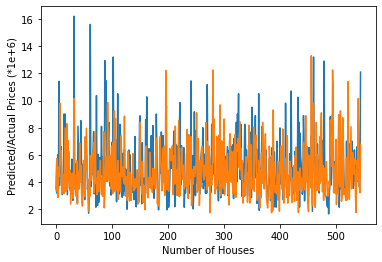

In [608]:
import matplotlib.pyplot as plt
torch.Tensor.ndim = property(lambda self: len(self.shape)) 
x = list(range(0, m))
plt.xlabel("Number of Houses")
plt.ylabel("Predicted/Actual Prices (*1e+6)")
plt.plot(x, t_p.detach().numpy())
plt.plot(x, t_c)
plt.show()